In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

from lenstools.simulations.fastpm import FastPMSnapshot 
from lenstools.simulations.raytracing import DensityPlane, PotentialPlane

In [4]:
#Read in the snapshot
snap_path = "/Users/andreapetri/Documents/Cosmology_software/LensTools/SimTest/Storage/Om0.290_Ol0.710/128b128/ic1/snapshots/lightconeresult"
snap = FastPMSnapshot.open(snap_path)

In [36]:
#Location and thickness of the lens
plane_center = 60.*snap.Mpc_over_h
plane_thickness = 10.*snap.Mpc_over_h

plane_center,plane_thickness

(<Quantity 60.0 Mpc/h>, <Quantity 10.0 Mpc/h>)

In [28]:
#Cut a two dimensional lens
density_2d,res,npart = snap.cutPlaneGaussianGrid(normal=2,center=plane_center,thickness=plane_thickness,plane_resolution=64,kind="density")
potential_2d,res,npart = snap.cutPlaneGaussianGrid(normal=2,center=plane_center,thickness=plane_thickness,plane_resolution=64,kind="potential")

In [29]:
#Plane shape
density_2d.shape

(64, 64)

In [10]:
#Two dimensional resolution and number of particles on the plane
res,npart

([<Quantity 2.0 Mpc/h>, <Quantity 2.0 Mpc/h>], 131511.0)

In [30]:
#Build PotentialPlane and DensityPlane instances
density_2d = DensityPlane(density_2d,angle=snap.header["box_size"],comoving_distance=plane_center)
potential_2d = PotentialPlane(potential_2d.value,angle=snap.header["box_size"],comoving_distance=plane_center,unit=u.rad**2)

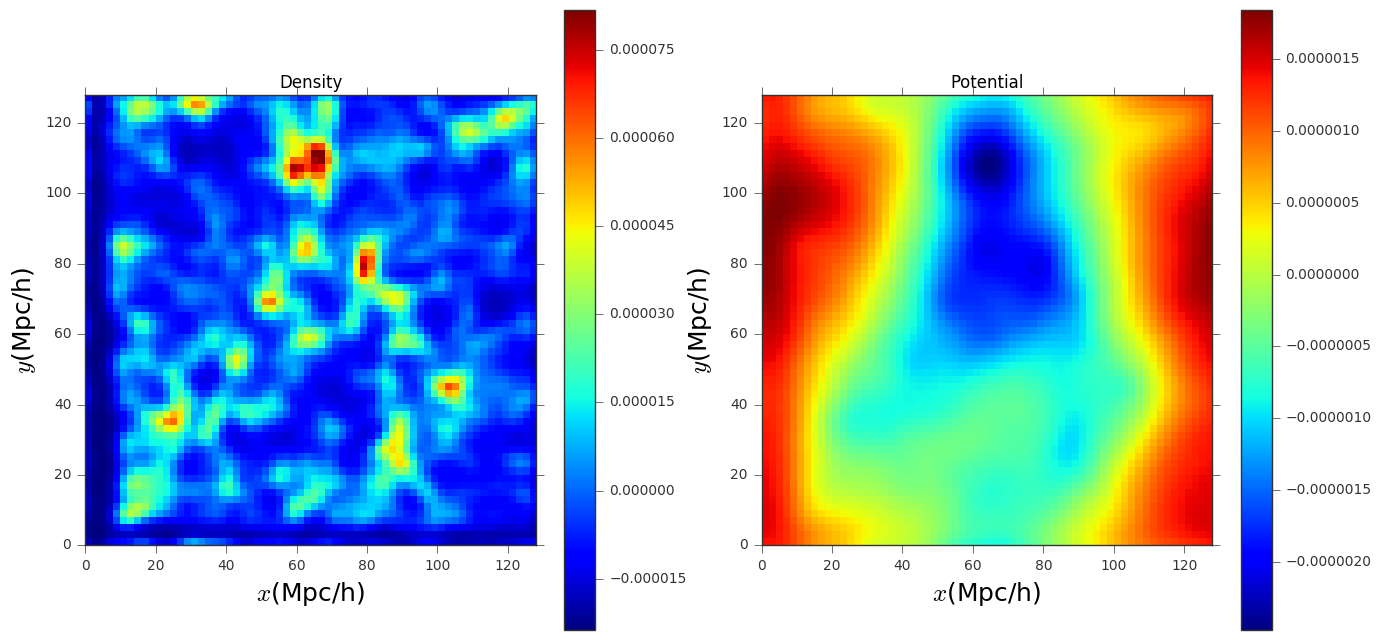

In [35]:
#Visualize
fig,ax = plt.subplots(1,2,figsize=(16,8))
density_2d.visualize(fig=fig,ax=ax[0],colorbar=True)
potential_2d.visualize(fig=fig,ax=ax[1],colorbar=True)

ax[0].set_title("Density")
ax[1].set_title("Potential")

In [44]:
#Close snapshot
snap.close()